In [1]:
import pandas as pd

df = pd.read_csv('4_caps_data.csv')
columns_to_keep = ["Structure Type", "CIF", "Formula", "tcsp_center", "tcsp_prism_formula", "tcsp_caps_formula", "tctp_1_center", "tctp_1_prism_formula", "tctp_1_cap_formula", "tctp_2_center", "tctp_2_prism_formula", "tctp_2_cap_formula"]
df_filtered = df[columns_to_keep]

#df_filtered = df_filtered[df_filtered['num_tctp_caps'] != 0]
df_filtered

,Structure Type,CIF,Formula,tcsp_center,tcsp_prism_formula,tcsp_caps_formula,tctp_1_center,tctp_1_prism_formula,tctp_1_cap_formula,tctp_2_center,tctp_2_prism_formula,tctp_2_cap_formula
0,Mg4CuTb-type Cmmm,1629135.cif,CuMg4Y,Mg,Mg6Y2,Mg3Cu,Cu,Y4Mg2,Mg3,NaN,NaN,NaN
1,Mg4CuTb-type Cmmm,1629135.cif,CuMg4Y,Mg,Mg6Y2,Mg3Cu,Cu,Y4Mg2,Mg3,NaN,NaN,NaN
2,Mg4CuTb-type Cmmm,1629135.cif,CuMg4Y,Mg,Y8,Cu4,Cu,Y4Mg2,Mg3,NaN,NaN,NaN
3,Mg4CuTb-type Cmmm,1622981.cif,CuMg4Tb,Mg,Mg6Tb2,Mg3Cu,Cu,Tb4Mg2,Mg3,NaN,NaN,NaN
4,Mg4CuTb-type Cmmm,1622981.cif,CuMg4Tb,Mg,Mg6Tb2,Mg3Cu,Cu,Tb4Mg2,Mg3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
799,Ru4Al3B2-type P4/mmm,1703882.cif,Al3B2Ru4,Al,Ru8,B4,B,Ru6,Al3,NaN,NaN,NaN
800,Ru4Al3B2-type P4/mmm,1535328.cif,Al3B2Ru4,Al,Ru8,B4,B,Ru6,Al3,NaN,NaN,NaN
801,MgCeSi2-type I41/amd,1222394.cif,CeMgSi2,Mg,Ce4Mg4,Si4,Si,Ce4Mg2,Mg2Si,NaN,NaN,NaN
802,MgCeSi2-type I41/amd,1222396.cif,CeMgSi2,Mg,Ce4Mg4,Si4,Si,Ce4Mg2,Mg2Si,NaN,NaN,NaN


In [2]:
import pandas as pd

def process_dataframe(df):
    """
    Consolidates the structure information from the original "tcsp" columns and the additional
    "tctp_1" and "tctp_2" columns into a single dataframe.

    Parameters:
        df (pd.DataFrame): Input dataframe containing columns:
            - 'Structure Type', 'CIF', 'Formula'
            - 'tcsp_center', 'tcsp_prism_formula', 'tcsp_caps_formula'
            - 'tctp_1_center', 'tctp_1_prism_formula', 'tctp_1_cap_formula'
            - 'tctp_2_center', 'tctp_2_prism_formula', 'tctp_2_cap_formula'

    Returns:
        pd.DataFrame: A new dataframe with columns:
            - 'Structure Type', 'CIF', 'Formula', 'center', 'prism_formula', 'caps_formula'
    """
    # Process the main structure (tcsp) columns
    df_tcsp = df[['Structure Type', 'CIF', 'Formula', 
                  'tcsp_center', 'tcsp_prism_formula', 'tcsp_caps_formula']].copy()
    df_tcsp = df_tcsp.rename(columns={
        'tcsp_center': 'tcsp_center',
        'tcsp_prism_formula': 'tcsp_prism_formula',
        'tcsp_caps_formula': 'tcsp_caps_formula'
    })
    
    # Process the first additional structure (tctp_1) columns
    df_tctp1 = df[['Structure Type', 'CIF', 'Formula', 
                   'tctp_1_center', 'tctp_1_prism_formula', 'tctp_1_cap_formula']].copy()
    df_tctp1 = df_tctp1.rename(columns={
        'tctp_1_center': 'tcsp_center',
        'tctp_1_prism_formula': 'tcsp_prism_formula',
        'tctp_1_cap_formula': 'tcsp_caps_formula'
    })
    
    # Process the second additional structure (tctp_2) columns
    df_tctp2 = df[['Structure Type', 'CIF', 'Formula', 
                   'tctp_2_center', 'tctp_2_prism_formula', 'tctp_2_cap_formula']].copy()
    df_tctp2 = df_tctp2.rename(columns={
        'tctp_2_center': 'tcsp_center',
        'tctp_2_prism_formula': 'tcsp_prism_formula',
        'tctp_2_cap_formula': 'tcsp_caps_formula'
    })
    
    # Combine all the rows vertically into one dataframe
    result_df = pd.concat([df_tcsp, df_tctp1, df_tctp2], ignore_index=True)
    
    # Optionally, drop rows where all of the new structure columns are NaN
    result_df = result_df.dropna(subset=['tcsp_center', 'tcsp_prism_formula', 'tcsp_caps_formula'], how='all')
    
    return result_df

df_processed = process_dataframe(df_filtered)
df_processed

,Structure Type,CIF,Formula,tcsp_center,tcsp_prism_formula,tcsp_caps_formula
0,Mg4CuTb-type Cmmm,1629135.cif,CuMg4Y,Mg,Mg6Y2,Mg3Cu
1,Mg4CuTb-type Cmmm,1629135.cif,CuMg4Y,Mg,Mg6Y2,Mg3Cu
2,Mg4CuTb-type Cmmm,1629135.cif,CuMg4Y,Mg,Y8,Cu4
3,Mg4CuTb-type Cmmm,1622981.cif,CuMg4Tb,Mg,Mg6Tb2,Mg3Cu
4,Mg4CuTb-type Cmmm,1622981.cif,CuMg4Tb,Mg,Mg6Tb2,Mg3Cu
...,...,...,...,...,...,...
2334,La11Ru2Al6-type Pbam,1631451.cif,Al6La11Ru2,Al,La6,La2Ru
2402,Mg5Si6-type C2/m,1123566.cif,Mg5Si6,Si,Mg4Si2,Mg2Si
2403,Mg5Si6-type C2/m,1123566.cif,Mg5Si6,Si,Mg4Si2,Mg2Si
2404,Mg5Si6-type C2/m,1935126.cif,Mg5Si6,Si,Mg4Si2,Mg2Si


In [3]:
#from preprocess import process_tctp_sites

#df_filtered['tctp_sites_processed'] = df_filtered['tctp_sites'].apply(process_tctp_sites)
#df_filtered.head(15)

In [4]:
from sort_structure import sort_dataframe_by_structure_type

df_sorted = sort_dataframe_by_structure_type(df_processed, col="Structure Type")
df_sorted

,Structure Type,CIF,Formula,tcsp_center,tcsp_prism_formula,tcsp_caps_formula,Normalized Structure Type,Group Number
656,U3Si2-type P4/mbm,454184.cif,Pu3Si2,Pu,Pu8,Si4,U3Si2-type P4/mbm,1
595,U3Si2-type P4/mbm,261421.cif,B2Ta3,Ta,Ta8,B4,U3Si2-type P4/mbm,1
594,U3Si2-type P4/mbm,454278.cif,Ce3Si2,Ce,Ce8,Si4,U3Si2-type P4/mbm,1
593,U3Si2-type P4/mbm,550032.cif,La3Si2,La,La8,Si4,U3Si2-type P4/mbm,1
592,U3Si2-type P4/mbm,1224377.cif,Ce3Si2,Ce,Ce8,Si4,U3Si2-type P4/mbm,1
...,...,...,...,...,...,...,...,...
698,Cu4Nb5Si4-type I4/m,1412721.cif,As4Nb5Pd4,Pd,Pd4As2Nb2,Nb2AsPd,Cu4Nb5Si4-type I4/m,13
699,Cu4Nb5Si4-type I4/m,1412721.cif,As4Nb5Pd4,Nb,Nb8,As4,Cu4Nb5Si4-type I4/m,13
700,Cu4Nb5Si4-type I4/m,303263.cif,Cu4Nb5Si4,Cu,Cu4Nb2Si2,Nb2CuSi,Cu4Nb5Si4-type I4/m,13
702,Cu4Nb5Si4-type I4/m,1007887.cif,Nb5Ni4P4,Ni,Ni4Nb2P2,Nb2NiP,Cu4Nb5Si4-type I4/m,13


In [5]:
from new_plot import calculate_average_points, plot_periodic_table_with_structures

coord_df = pd.read_excel('table_coordinates.xlsx', sheet_name="separated_table")

avg_df = calculate_average_points(df_processed, coord_df)

In [6]:
#plot_periodic_table_with_structures(df_sorted, coord_df, avg_df)

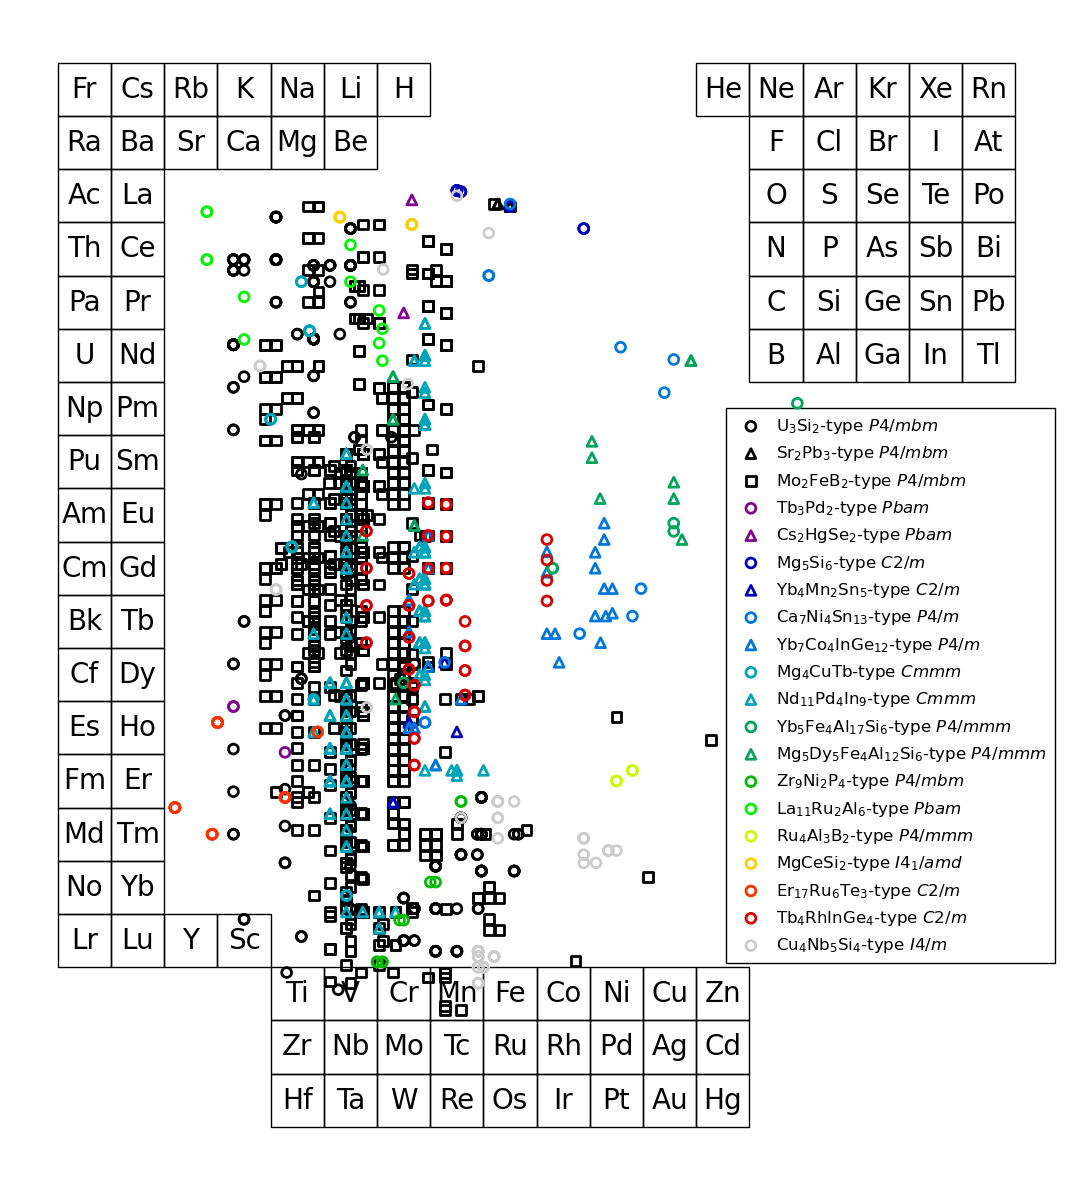

Plot saved as plots/all_structures_20.png


In [7]:
from new_plot import plot_periodic_table_all_types

plot_periodic_table_all_types(df_sorted, coord_df, avg_df)

/opt/anaconda3/envs/binary/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/anaconda3/envs/binary/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/anaconda3/envs/binary/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/anaconda3/envs/binary/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/anaconda3/envs/binary/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/anaconda3/envs/binary/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarni

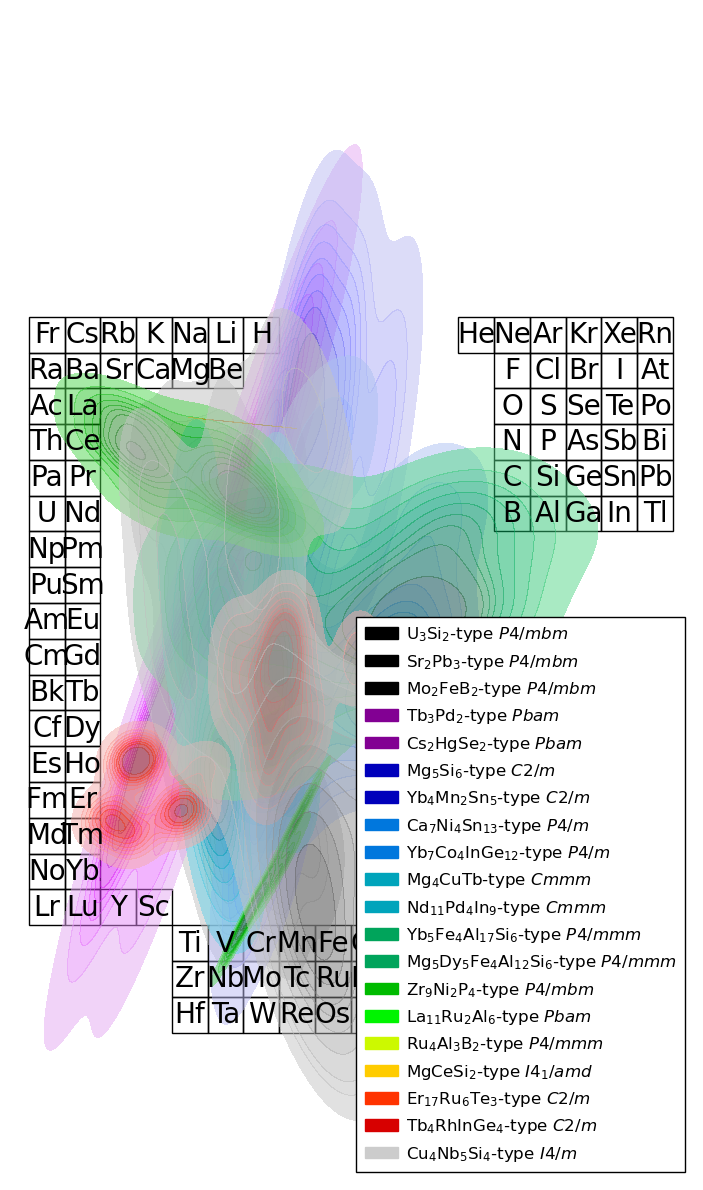

Plot saved as plots/all_structures_kde_9.png


In [ ]:
# from new_plot import plot_periodic_table_all_types_kde

# plot_periodic_table_all_types_kde(df_sorted, coord_df, avg_df)

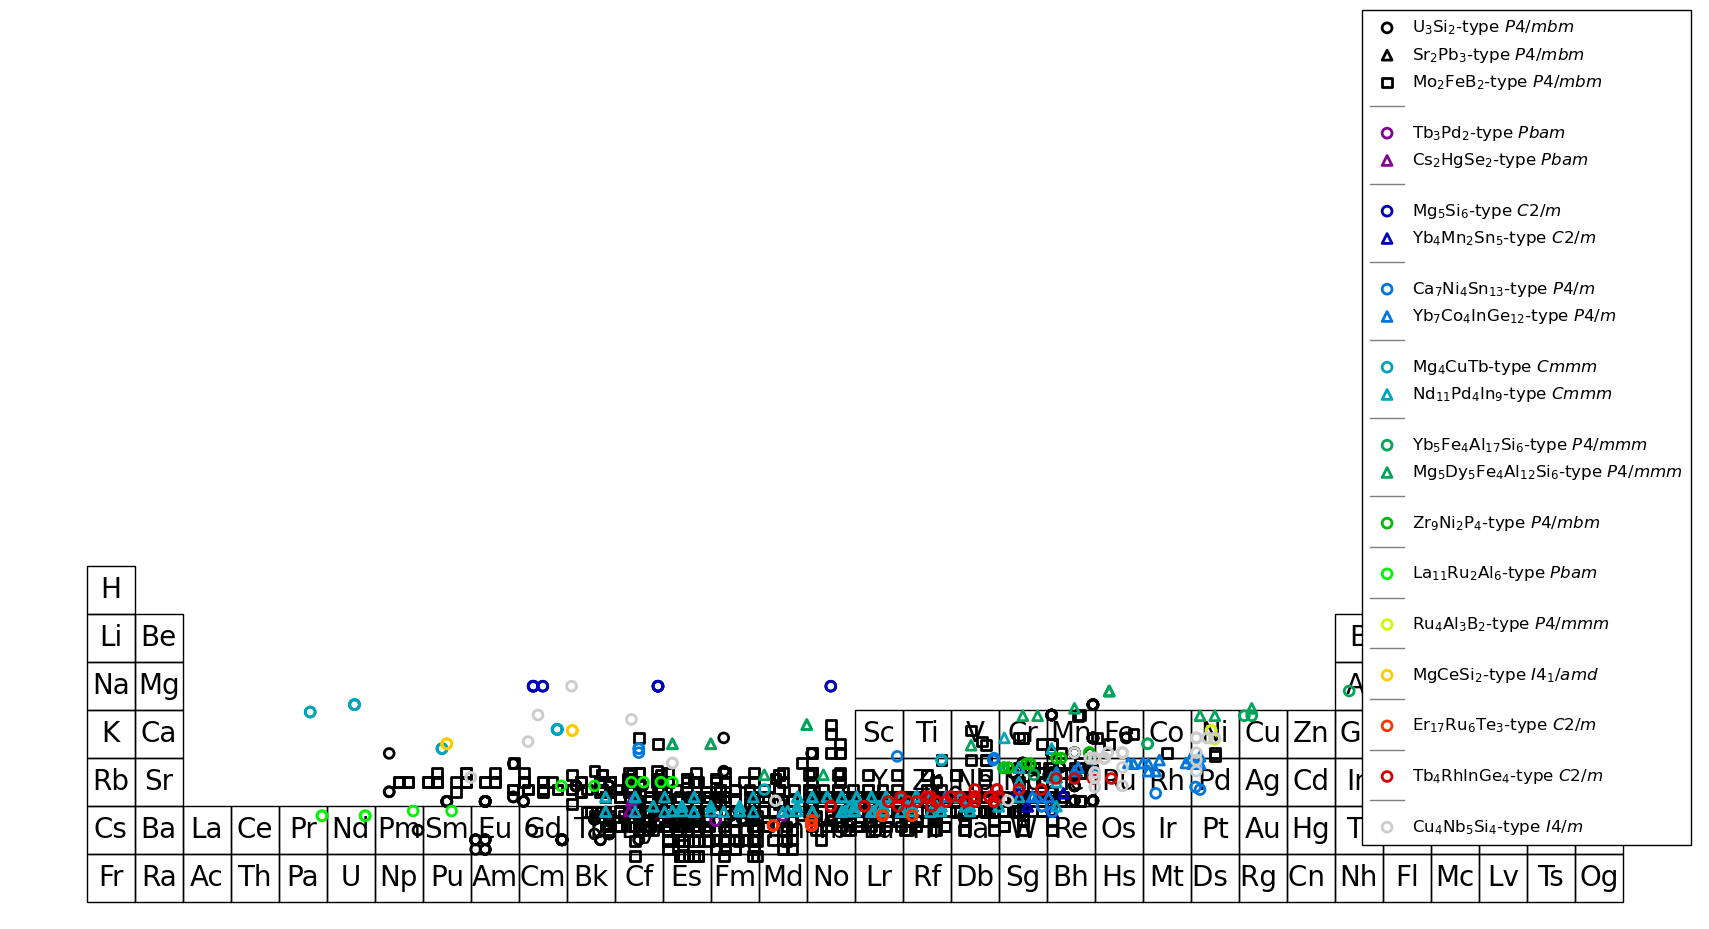

Plot saved as plots/all_structures_21.png


In [9]:
from new_plot import plot_periodic_table_all_types_long
coord_long_df = pd.read_excel('table_coordinates.xlsx', sheet_name="long_table")

avg_long_df = calculate_average_points(df_sorted, coord_long_df)

plot_periodic_table_all_types_long(df_sorted, coord_long_df, avg_long_df)